In [1]:
import glob
import os
import pandas as pd
import numpy as np
import tqdm

In [2]:
df = pd.DataFrame(columns=['image_path', 'image_formate', 'image_name', 'image_lable'])
dataset_folder_path = os.path.join('..', 'Dataset', 'dataset1')

for image in glob.glob(os.path.join(dataset_folder_path, '*', '*')):
#     print(image.split('\\')[-1].split('.')[-1])
    image_path = image
    image_formate = image.split('\\')[-1].split('.')[-1]
    image_name = image.split('\\')[-1]
    image_folder = image.split('\\')[-2]
    
    data = {
        'image_path': image_path, 
        'image_formate': image_formate, 
        'image_name': image_name, 
        'image_lable': image_folder
    }
    df.loc[len(df)] = data

#     break

display(df)

,image_path,image_formate,image_name,image_lable
0,..\Dataset\dataset1\all_benign\all_benign_0001...,jpg,all_benign_0001.jpg,all_benign
1,..\Dataset\dataset1\all_benign\all_benign_0002...,jpg,all_benign_0002.jpg,all_benign
2,..\Dataset\dataset1\all_benign\all_benign_0003...,jpg,all_benign_0003.jpg,all_benign
3,..\Dataset\dataset1\all_benign\all_benign_0004...,jpg,all_benign_0004.jpg,all_benign
4,..\Dataset\dataset1\all_benign\all_benign_0005...,jpg,all_benign_0005.jpg,all_benign
...,...,...,...,...
129997,..\Dataset\dataset1\oral_scc\oral_scc_4996.jpg,jpg,oral_scc_4996.jpg,oral_scc
129998,..\Dataset\dataset1\oral_scc\oral_scc_4997.jpg,jpg,oral_scc_4997.jpg,oral_scc
129999,..\Dataset\dataset1\oral_scc\oral_scc_4998.jpg,jpg,oral_scc_4998.jpg,oral_scc
130000,..\Dataset\dataset1\oral_scc\oral_scc_4999.jpg,jpg,oral_scc_4999.jpg,oral_scc


### Links

[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

[LabelEncoder](https://www.analyticsvidhya.com/blog/2023/07/label-encoding-in-python/)

[LabelEncoder](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/)


In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['class']= label_encoder.fit_transform(df['image_lable']) 
display(df)

,image_path,image_formate,image_name,image_lable,class
0,..\Dataset\dataset1\all_benign\all_benign_0001...,jpg,all_benign_0001.jpg,all_benign,0
1,..\Dataset\dataset1\all_benign\all_benign_0002...,jpg,all_benign_0002.jpg,all_benign,0
2,..\Dataset\dataset1\all_benign\all_benign_0003...,jpg,all_benign_0003.jpg,all_benign,0
3,..\Dataset\dataset1\all_benign\all_benign_0004...,jpg,all_benign_0004.jpg,all_benign,0
4,..\Dataset\dataset1\all_benign\all_benign_0005...,jpg,all_benign_0005.jpg,all_benign,0
...,...,...,...,...,...
129997,..\Dataset\dataset1\oral_scc\oral_scc_4996.jpg,jpg,oral_scc_4996.jpg,oral_scc,25
129998,..\Dataset\dataset1\oral_scc\oral_scc_4997.jpg,jpg,oral_scc_4997.jpg,oral_scc,25
129999,..\Dataset\dataset1\oral_scc\oral_scc_4998.jpg,jpg,oral_scc_4998.jpg,oral_scc,25
130000,..\Dataset\dataset1\oral_scc\oral_scc_4999.jpg,jpg,oral_scc_4999.jpg,oral_scc,25


In [4]:
data_file = os.path.join('..', 'Dataset', 'dataset1_label_and_classes.csv')
df.to_csv(data_file, index=False)

### Split dataset

In [5]:
df = pd.read_csv(data_file)
df.head()

,image_path,image_formate,image_name,image_lable,class
0,..\Dataset\dataset1\all_benign\all_benign_0001...,jpg,all_benign_0001.jpg,all_benign,0
1,..\Dataset\dataset1\all_benign\all_benign_0002...,jpg,all_benign_0002.jpg,all_benign,0
2,..\Dataset\dataset1\all_benign\all_benign_0003...,jpg,all_benign_0003.jpg,all_benign,0
3,..\Dataset\dataset1\all_benign\all_benign_0004...,jpg,all_benign_0004.jpg,all_benign,0
4,..\Dataset\dataset1\all_benign\all_benign_0005...,jpg,all_benign_0005.jpg,all_benign,0


In [22]:
df['class'].unique(), len(df['class'].unique())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64),
 26)

In [11]:
df['class'].value_counts()

class
25    5001
24    5001
1     5000
23    5000
22    5000
21    5000
20    5000
19    5000
18    5000
17    5000
16    5000
15    5000
14    5000
0     5000
12    5000
11    5000
10    5000
9     5000
8     5000
7     5000
6     5000
5     5000
4     5000
3     5000
2     5000
13    5000
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(df, random_state=104,test_size=0.2, shuffle=True)

In [19]:
train_val.shape, test.shape

((104001, 5), (26001, 5))

In [20]:
test['class'].unique(), len(test['class'].unique())

(array([12, 24, 21,  2,  6,  4, 23, 22,  8,  0, 20,  5,  1, 15, 13, 10,  9,
        16, 19, 25, 14, 17,  3,  7, 11, 18], dtype=int64),
 26)

In [21]:
test['class'].value_counts()

class
6     1044
7     1042
20    1035
18    1031
2     1023
3     1022
0     1019
1     1010
9     1007
10    1007
15    1007
21    1003
12    1003
24    1000
11    1000
13     997
25     993
22     984
5      983
19     981
17     980
14     974
8      973
16     964
23     962
4      957
Name: count, dtype: int64

In [23]:
train_val['class'].unique(), len(train_val['class'].unique())

(array([ 3,  9, 14,  0, 11,  6, 21, 10,  8, 15,  1, 24,  4, 12,  2, 22, 19,
        23, 18,  5, 13, 25, 17,  7, 16, 20], dtype=int64),
 26)

In [24]:
train_val['class'].value_counts()

class
4     4043
23    4038
16    4036
8     4027
14    4026
17    4020
19    4019
5     4017
22    4016
25    4008
13    4003
24    4001
11    4000
12    3997
21    3997
9     3993
15    3993
10    3993
1     3990
0     3981
3     3978
2     3977
18    3969
20    3965
7     3958
6     3956
Name: count, dtype: int64

In [25]:
train_val_data_file = os.path.join('..', 'Dataset', 'train_val_data_dataset1_label_and_classes.csv')
train_val.to_csv(train_val_data_file, index=False)

test_data_file = os.path.join('..', 'Dataset', 'test_data_dataset1_label_and_classes.csv')
test.to_csv(test_data_file, index=False)

In [44]:
train_val = pd.read_csv(train_val_data_file)
X, y = train_val.drop('class',axis=1), train_val['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=104, shuffle=True, stratify=y)

In [45]:
X_train.shape, X_test.shape

((62400, 4), (41601, 4))

<Axes: xlabel='image_lable'>

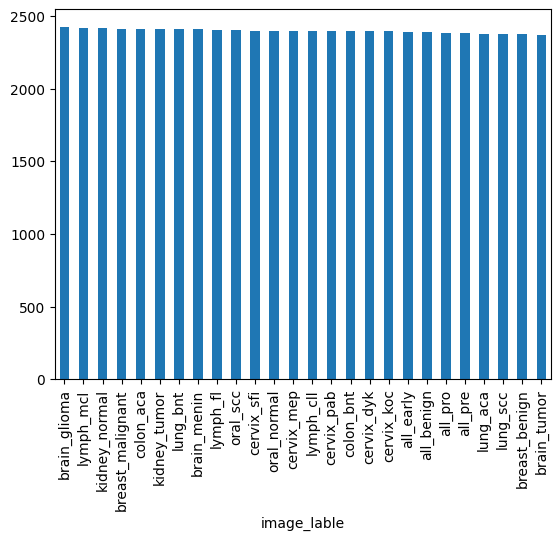

In [46]:
X_train['image_lable'].value_counts()[:].plot(kind='bar')

In [47]:
X_train['image_lable'].value_counts()

image_lable
brain_glioma        2426
lymph_mcl           2423
kidney_normal       2421
breast_malignant    2416
colon_aca           2415
kidney_tumor        2412
lung_bnt            2411
brain_menin         2410
lymph_fl            2409
oral_scc            2405
cervix_sfi          2402
oral_normal         2401
cervix_mep          2400
lymph_cll           2398
cervix_pab          2398
colon_bnt           2396
cervix_dyk          2396
cervix_koc          2396
all_early           2394
all_benign          2389
all_pro             2387
all_pre             2386
lung_aca            2381
lung_scc            2379
breast_benign       2375
brain_tumor         2374
Name: count, dtype: int64

<Axes: xlabel='image_lable'>

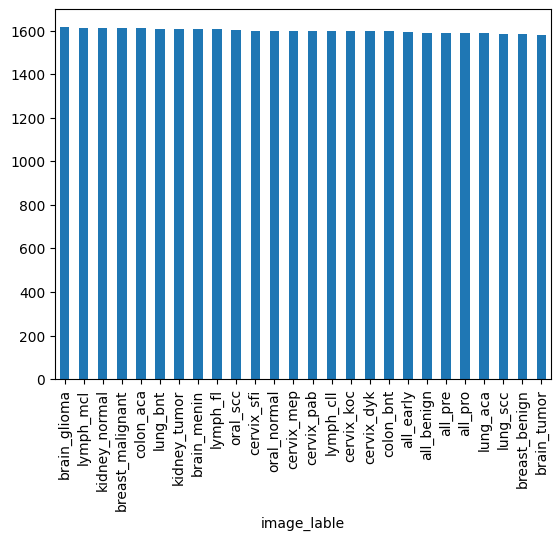

In [48]:
X_test['image_lable'].value_counts()[:].plot(kind='bar')

In [49]:
X_test['image_lable'].value_counts()

image_lable
brain_glioma        1617
lymph_mcl           1615
kidney_normal       1615
breast_malignant    1611
colon_aca           1611
lung_bnt            1608
kidney_tumor        1608
brain_menin         1607
lymph_fl            1607
oral_scc            1603
cervix_sfi          1601
oral_normal         1600
cervix_mep          1600
cervix_pab          1599
lymph_cll           1599
cervix_koc          1597
cervix_dyk          1597
colon_bnt           1597
all_early           1596
all_benign          1592
all_pre             1591
all_pro             1591
lung_aca            1588
lung_scc            1586
breast_benign       1583
brain_tumor         1582
Name: count, dtype: int64

In [55]:
training_data = pd.concat([X_train, y_train], axis=1)
training_data_file = os.path.join('..', 'Dataset', 'training_data_dataset1_label_and_classes.csv')
training_data.to_csv(training_data_file, index=False)

testing_data = pd.concat([X_test, y_test], axis=1)
testing_data_file = os.path.join('..', 'Dataset', 'testing_data_dataset1_label_and_classes.csv')
testing_data.to_csv(testing_data_file, index=False)


### Move Images

In [73]:
import shutil 

train_folder_name =  os.path.join('..', 'Dataset', 'data', 'train')
os.makedirs(train_folder_name, exist_ok=True) 

for index, row in training_data.iterrows():
    os.makedirs(os.path.join(train_folder_name, str(row['class'])), exist_ok=True) 

    source = row['image_path']
    destination = os.path.join(train_folder_name, str(row['class']), row['image_name'])
    shutil.copy2(source, destination) 
    
#     break

In [75]:
test_folder_name =  os.path.join('..', 'Dataset', 'data', 'test')
os.makedirs(test_folder_name, exist_ok=True) 

for index, row in testing_data.iterrows():
    os.makedirs(os.path.join(test_folder_name, str(row['class'])), exist_ok=True) 
    
    source = row['image_path']
    destination = os.path.join(test_folder_name, str(row['class']), row['image_name'])
    shutil.copy2(source, destination) 
    
#     break

In [81]:
test_data = pd.read_csv(test_data_file)

val_folder_name =  os.path.join('..', 'Dataset', 'data', 'val')
os.makedirs(val_folder_name, exist_ok=True) 

for index, row in test_data.iterrows():
    os.makedirs(os.path.join(val_folder_name, str(row['class'])), exist_ok=True) 
    
    source = row['image_path']
    destination = os.path.join(val_folder_name, str(row['class']), row['image_name'])
    shutil.copy2(source, destination) 
    
#     break